In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline


In [55]:
dfx = pd.read_csv('split_Xtr0.csv', header=None)
dfy = pd.read_csv('Ytr0.csv' )
list(dfy.columns.values)
dfy=dfy.drop(["Unnamed: 0"], axis=1)
dfy.head()



,Bound
0,0
1,0
2,1
3,1
4,0


In [56]:
def to_class(x):
    if x==1:
        return +1
    else:
        return -1

dfy = dfy.applymap(to_class)
dfy.head()

,Bound
0,-1
1,-1
2,1
3,1
4,-1


In [57]:
lenc = LabelEncoder()
num_features = dfx.apply(lenc.fit_transform)
num_features

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,3,0,2,0,3,2,3,1,0,0,...,3,0,3,0,0,2,2,2,0,2
1,3,0,3,1,0,0,2,1,0,2,...,0,0,3,2,0,1,0,2,0,0
2,3,3,0,0,3,0,1,1,0,0,...,0,2,2,1,1,3,1,1,1,1
3,3,3,3,0,0,3,0,3,0,3,...,0,2,0,1,3,2,0,2,3,0
4,3,2,1,1,2,0,0,1,1,0,...,3,3,1,3,3,2,3,1,0,2
5,0,3,0,0,2,3,1,0,3,3,...,2,3,3,3,2,1,3,2,0,2
6,0,1,3,2,1,1,3,3,3,3,...,3,3,0,1,0,3,1,0,0,2
7,0,1,3,1,0,0,3,3,0,3,...,0,2,0,2,3,3,1,1,3,1
8,2,1,2,1,1,0,0,1,1,3,...,1,3,2,2,2,1,1,2,3,0
9,0,3,3,3,2,0,3,3,3,2,...,0,3,0,1,3,1,3,1,3,0


In [58]:
dfxtest = pd.read_csv('split_Xte0.csv', header=None)

lenc = LabelEncoder()
dfxtest = dfxtest.apply(lenc.fit_transform)

dfxtest.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,0,2,0,3,2,2,1,2,1,...,1,0,0,0,2,2,2,1,0,0
1,2,1,1,1,0,0,2,0,3,0,...,0,3,2,0,1,1,1,0,0,0
2,2,3,3,1,3,1,3,1,1,0,...,0,1,0,3,0,2,3,1,1,0
3,3,1,2,0,2,3,2,0,3,2,...,0,2,0,3,1,1,0,3,3,1
4,1,3,3,1,3,0,0,2,0,0,...,1,0,0,0,1,0,3,3,0,3


In [34]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [35]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [36]:
preproData.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
intercept,2000.0,1.000000e+00,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
0,2000.0,-4.241052e-17,1.00025,-1.249710,-1.249710,-0.401299,1.295524,1.295524
1,2000.0,-1.820766e-16,1.00025,-1.317976,-1.317976,0.401497,1.261234,1.261234
2,2000.0,-2.524647e-16,1.00025,-1.274420,-1.274420,-0.416225,1.300166,1.300166
3,2000.0,2.846612e-16,1.00025,-1.290012,-1.290012,0.416918,1.270382,1.270382


In [59]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
XTrain, XTest, yTrain, yTest = train_test_split(num_features,dfy.values.ravel(),test_size = 0.25) # split data in two

In [60]:
modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(XTrain,yTrain)
yPred = modelSVMLinear.predict(XTest)

In [61]:
##SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(XTrain,yTrain)
yPred = clf.predict(XTest)

E:\Users\RicardoHuarte\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Text(0.5,15,'predicted label')

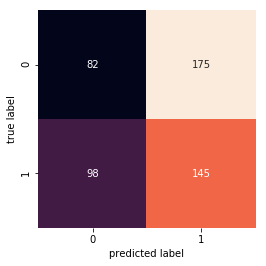

In [62]:
mat = confusion_matrix(yTest, yPred)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g')
plt.ylabel('true label')
plt.xlabel('predicted label')

In [63]:
metrics.precision_score(yTest, yPred, labels=None, sample_weight=None)

0.453125

In [64]:
metrics.accuracy_score(yTest, yPred, normalize=True, sample_weight=None)

0.45400000000000001

In [65]:
lam = 0.001 #  REGULARIZATION 

m,n = XTrain.shape # SIZES: m = Number of examples n = feature size 

L = 0.25*max(np.linalg.norm(preproData.values,2,axis=1))**2 + lam # Lispchitz constant of f
mu = lam # Strong convexity constant

In [66]:
def f(x):
    A = XTrain.values
    b = yTrain
    l = 0.0
    for i in range(A.shape[0]):
        if b[i] > 0 :
            l += np.log( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
        else:
            l += np.log( 1 + np.exp(np.dot( A[i] , x ) ) ) 
    return l/m + lam/2.0*np.dot(x,x)

In [67]:
def f_grad(x):
    A = XTrain.values
    b = yTrain
    g = np.zeros(n)
    for i in range(A.shape[0]):
        if b[i] > 0:
            g += -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) 
        else:
            g += A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
    return g/m + lam*x

In [68]:
import timeit

def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    stop = PREC*np.linalg.norm(f_grad(x0) )

    x_tab = np.copy(x)
    print("------------------------------------\n Constant Stepsize gradient\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        g = f_grad(x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

        if np.linalg.norm(g) < stop:
            break
    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [69]:
#### Parameter we give at our algorithm 
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                     # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1.99/(L)

##### gradient algorithm
x,x_tab = gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )

------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.060867815581257693
FINISHED -- 499 iterations / 3.575477s -- final value: 1.237657




In [70]:
F =  []
for i in range(x_tab.shape[0]):
    F.append(f(x_tab[i,:]))

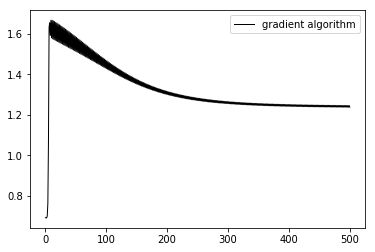

In [71]:
plt.plot(F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.legend();

In [72]:
yPredLog = np.sign( 1/(1.0 + np.exp( - (XTest.values).dot(x) )) - 0.5) # +1 if Prob (a) > 0.5

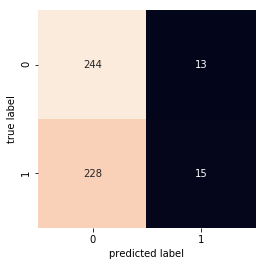

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yTest, yPredLog)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g');
plt.ylabel('true label');
plt.xlabel('predicted label');

In [79]:
metrics.accuracy_score(yTest, yPredLog, normalize=True, sample_weight=None)

0.51800000000000002

<h1>Intremental algorithm</h1>

In [80]:
def f_grad_ex(i,x):
    A = XTrain.values[i,:]
    b = yTrain[i]
    g = np.zeros(n)
    if b > 0:
        g += -A/( 1 + np.exp(np.dot( A , x ) ) ) 
    else:
        g += A/( 1 + np.exp(-np.dot( A , x ) ) ) 
    return g + lam*x/m

In [81]:
import timeit

def stochastic_gradient_algorithm(f , f_grad_ex , x0  , ITE_MAX ):
    x = np.copy(x0)

    x_tab = np.copy(x)
    print("------------------------------------\n Stochastic gradient\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        i = np.random.choice(m)
        step = 1.0/(L*(k+1)**0.7)
        
        g = f_grad_ex(i,x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [82]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point

##### gradient algorithm
x_sto,x_sto_tab = stochastic_gradient_algorithm(f , f_grad_ex , x0   , ITE_MAX )

------------------------------------
 Stochastic gradient
------------------------------------
START 
FINISHED -- 9999 iterations / 18.496929s -- final value: 0.677874




In [83]:
F_sto =  []
Ite_sto = []
for i in range(0,x_sto_tab.shape[0],int(x_sto_tab.shape[0]/500.0)):
    F_sto.append(f(x_sto_tab[i,:]))
    Ite_sto.append(i)

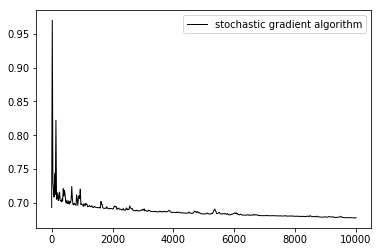

In [84]:
plt.plot(Ite_sto, F_sto, color="black", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

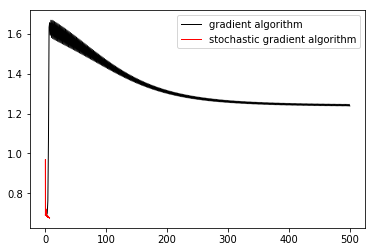

In [85]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

In [86]:
import timeit

def SAGA(f , f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    x_tab = np.copy(x)
    print("------------------------------------\n SAGA\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        e = np.random.choice(m)
                
        g = f_grad_ex(e,x)
        
        x = x - step*(g - p_tab[e,:] + sum(p_tab)/float(m) )
        
        p_tab[e,:] = np.copy(g)

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [87]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1/(2*(mu*m + L))

##### gradient algorithm
x_saga,x_saga_tab = SAGA(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SAGA
------------------------------------
START 
FINISHED -- 9999 iterations / 28.384406s -- final value: 1.337584




In [88]:
F_saga =  []
Ite_saga = []
for i in range(0,x_saga_tab.shape[0],int(x_saga_tab.shape[0]/500.0)):
    F_saga.append(f(x_saga_tab[i,:]))
    Ite_saga.append(i)

In [89]:
import timeit

def SVRG(f ,  f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    M = 20
    
    x_tab = np.copy(x)
    print("------------------------------------\n SVRG\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(int(ITE_MAX/M)):
        
        for i in range(m):
            p_tab[i,:] = f_grad_ex(i,x)
        
        true_grad = sum(p_tab)/float(m)
        
        for j in range(M):
            e = np.random.choice(m)
              
            g = f_grad_ex(e,x)
        
            x = x - step*(g - p_tab[e,:] +true_grad )
        
            x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [90]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 0.1/( L)

##### gradient algorithm
x_svrg,x_svrg_tab = SVRG(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SVRG
------------------------------------
START 
FINISHED -- 499 iterations / 31.975421s -- final value: 0.652892




In [91]:
F_svrg =  []
Ite_svrg = []
for i in range(0,x_svrg_tab.shape[0],int(x_svrg_tab.shape[0]/500.0)):
    F_svrg.append(f(x_svrg_tab[i,:]))
    Ite_svrg.append(i)

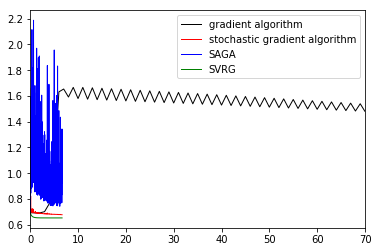

In [92]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.plot([x/float(m) for x in Ite_saga], F_saga, color="blue", linewidth=1.0, linestyle="-", label="SAGA");
plt.plot([x/float(m) for x in Ite_svrg], F_svrg, color="green", linewidth=1.0, linestyle="-", label="SVRG");
plt.xlim([0,70])
plt.legend();